In [1]:
import os
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import metrics as mt

# Load Accuracy Data

In [2]:
x_test_original = pd.read_csv('./data/student_performance/students-clean-test15-normalized.csv')
x_test_scaled = x_test_original.iloc[:,:-1]
num_features = x_test_scaled.shape[1] - 1

In [3]:
x_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                98 non-null     float64
 1   Medu               98 non-null     float64
 2   Fedu               98 non-null     float64
 3   traveltime         98 non-null     float64
 4   studytime          98 non-null     float64
 5   failures           98 non-null     float64
 6   famrel             98 non-null     float64
 7   freetime           98 non-null     float64
 8   goout              98 non-null     float64
 9   Dalc               98 non-null     float64
 10  Walc               98 non-null     float64
 11  health             98 non-null     float64
 12  absences           98 non-null     float64
 13  school_GP          98 non-null     float64
 14  school_MS          98 non-null     float64
 15  address_R          98 non-null     float64
 16  address_U          98 non-nu

In [4]:
df_metrics = pd.read_csv('./data/student_performance/NN/metrics/metrics.csv')
df_metrics.epoch = df_metrics.epoch.astype(int)
auc_desc = df_metrics.sort_values('auc').reset_index(drop=True).sort_values('epoch').index.values + 1
df_metrics['auc_ascending'] = auc_desc

In [5]:
df_metrics

,epoch,accuracy,balanced_accuracy,f1_score,precision,recall,auc,auc_ascending
0,1,0.846939,0.500000,0.917127,0.846939,1.000000,0.500000,2
1,2,0.785714,0.463855,0.880000,0.836957,0.927711,0.463855,1
2,3,0.775510,0.512450,0.870588,0.850575,0.891566,0.512450,3
3,4,0.826531,0.651807,0.898204,0.892857,0.903614,0.651807,13
4,5,0.806122,0.639759,0.884848,0.890244,0.879518,0.639759,8
5,6,0.806122,0.639759,0.884848,0.890244,0.879518,0.639759,9
6,7,0.816327,0.645783,0.891566,0.891566,0.891566,0.645783,12
7,8,0.846939,0.636546,0.912281,0.886364,0.939759,0.636546,7
8,9,0.806122,0.694378,0.881988,0.910256,0.855422,0.694378,35
9,10,0.806122,0.667068,0.883436,0.900000,0.867470,0.667068,16


# Load Feature Importance Data

In [6]:
attributions = {}
for epoch in np.arange(1,51):
    attributions[epoch] = {}
    directory = './data/student_performance/NN/feature_importance/epoch_' + str(epoch)
    for file_name in os.listdir(directory):
        # Cria o caminho completo para o arquivo
        file_path = os.path.join(directory, file_name)
        # Carrega o modelo a partir do arquivo
        attr = pd.read_csv(file_path)
        # Add no dicionario
        method = re.search('(.+?)_epoch', file_name)
        attributions[epoch][method.group(1)] = attr
        # Informa status
        print(f"Feature Importance {file_name} carregado com sucesso!")

Feature Importance DeepLift_epoch_1.csv carregado com sucesso!
Feature Importance Guided_Backprop_epoch_1.csv carregado com sucesso!
Feature Importance Input_X_Gradient_epoch_1.csv carregado com sucesso!
Feature Importance Integrated_Gradients_epoch_1.csv carregado com sucesso!
Feature Importance KernelShap_epoch_1.csv carregado com sucesso!
Feature Importance Lime_epoch_1.csv carregado com sucesso!
Feature Importance Occlusion_epoch_1.csv carregado com sucesso!
Feature Importance SmoothGrad_epoch_1.csv carregado com sucesso!
Feature Importance Vanilla_Gradients_epoch_1.csv carregado com sucesso!
Feature Importance DeepLift_epoch_2.csv carregado com sucesso!
Feature Importance Guided_Backprop_epoch_2.csv carregado com sucesso!
Feature Importance Input_X_Gradient_epoch_2.csv carregado com sucesso!
Feature Importance Integrated_Gradients_epoch_2.csv carregado com sucesso!
Feature Importance KernelShap_epoch_2.csv carregado com sucesso!
Feature Importance Lime_epoch_2.csv carregado com su

Feature Importance Integrated_Gradients_epoch_18.csv carregado com sucesso!
Feature Importance KernelShap_epoch_18.csv carregado com sucesso!
Feature Importance Lime_epoch_18.csv carregado com sucesso!
Feature Importance Occlusion_epoch_18.csv carregado com sucesso!
Feature Importance SmoothGrad_epoch_18.csv carregado com sucesso!
Feature Importance Vanilla_Gradients_epoch_18.csv carregado com sucesso!
Feature Importance DeepLift_epoch_19.csv carregado com sucesso!
Feature Importance Guided_Backprop_epoch_19.csv carregado com sucesso!
Feature Importance Input_X_Gradient_epoch_19.csv carregado com sucesso!
Feature Importance Integrated_Gradients_epoch_19.csv carregado com sucesso!
Feature Importance KernelShap_epoch_19.csv carregado com sucesso!
Feature Importance Lime_epoch_19.csv carregado com sucesso!
Feature Importance Occlusion_epoch_19.csv carregado com sucesso!
Feature Importance SmoothGrad_epoch_19.csv carregado com sucesso!
Feature Importance Vanilla_Gradients_epoch_19.csv carr

Feature Importance Input_X_Gradient_epoch_36.csv carregado com sucesso!
Feature Importance Integrated_Gradients_epoch_36.csv carregado com sucesso!
Feature Importance KernelShap_epoch_36.csv carregado com sucesso!
Feature Importance Lime_epoch_36.csv carregado com sucesso!
Feature Importance Occlusion_epoch_36.csv carregado com sucesso!
Feature Importance SmoothGrad_epoch_36.csv carregado com sucesso!
Feature Importance Vanilla_Gradients_epoch_36.csv carregado com sucesso!
Feature Importance DeepLift_epoch_37.csv carregado com sucesso!
Feature Importance Guided_Backprop_epoch_37.csv carregado com sucesso!
Feature Importance Input_X_Gradient_epoch_37.csv carregado com sucesso!
Feature Importance Integrated_Gradients_epoch_37.csv carregado com sucesso!
Feature Importance KernelShap_epoch_37.csv carregado com sucesso!
Feature Importance Lime_epoch_37.csv carregado com sucesso!
Feature Importance Occlusion_epoch_37.csv carregado com sucesso!
Feature Importance SmoothGrad_epoch_37.csv carre

In [7]:
def get_dict_topk(dict_attributions, list_methods, k=5):
    
    dict_topk = {}
    
    for method_name in list_methods:
        dict_topk[method_name] = mt.get_top_k(dict_attributions[method_name], k)        
    
    return dict_topk

In [8]:
def calc_metrics(ranking_size, methods, metric, dict_topk):
    
    # recuperando apenas o topk dos métodos de explicação indicados
    dict_topk = {k: v for k, v in dict_topk.items() if k in methods}
    
    #num_instancias do dataset
    first_element = next(iter(dict_topk.items()))
    num_instancias = len(first_element[1])
    
    # Matriz de pontos com as combinações dos métodos de explicação para a função feature agreement
    matrix_points, list_combinations_methods = mt.create_matrix_combination_methdos_by_metric(dict_topk, metric, num_instancias, methods)
    
    
    return matrix_points, list_combinations_methods

In [9]:
list_metrics = {
    "feature agreement": mt.feature_agreement,
    "rank agreement": mt.rank_agreement,
    "sign agreement": mt.sign_agreement,
    "signed rank agreement": mt.sign_rank_agreement,
}

In [10]:
explanation_methods = [*attributions[1].keys()]

In [11]:
df_agreement = pd.DataFrame(columns=['combination','agreement_level','epoch','k','metric'])

for metric_name, selected_metric in list_metrics.items():
    print(metric_name)
    for selected_k in np.arange(1,num_features+1):
        print(selected_k)
        for epoch in df_metrics.epoch.values:
            attr = attributions[epoch]
            dict_topk = get_dict_topk(attr, explanation_methods, selected_k)
            matrix_points, list_combinations_methods = calc_metrics(selected_k, explanation_methods, selected_metric, dict_topk)
            name_combinations_methods = [str(t) for t in list_combinations_methods]
            df_matrix = pd.DataFrame(matrix_points, columns=name_combinations_methods)
            df_new = pd.DataFrame([*df_matrix.mean(axis=0).index], columns=['combination'])
            df_new['agreement_level'] = [*df_matrix.mean(axis=0).values]
            df_new.loc[len(df_new)] = np.array(['Average', df_matrix.mean(axis=0).values.mean()])
            df_new['epoch'] = epoch
            df_new['k'] = selected_k
            df_new['metric'] = metric_name
            df_agreement = pd.concat([df_agreement, df_new])

feature agreement
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
rank agreement
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
sign agreement
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
signed rank agreement
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


In [12]:
df_agreement.to_csv('./data/student_performance/NN/experiment_C/agreement_level.csv', index=False)

In [14]:
df_agreement.head()

,combination,agreement_level,epoch,k,metric
0,"('DeepLift', 'Guided_Backprop')",0.071429,1,1,feature agreement
1,"('DeepLift', 'Input_X_Gradient')",0.081633,1,1,feature agreement
2,"('DeepLift', 'Integrated_Gradients')",0.091837,1,1,feature agreement
3,"('DeepLift', 'KernelShap')",0.061224,1,1,feature agreement
4,"('DeepLift', 'Lime')",0.081633,1,1,feature agreement


In [15]:
df_agreement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399600 entries, 0 to 36
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   combination      399600 non-null  object
 1   agreement_level  399600 non-null  object
 2   epoch            399600 non-null  object
 3   k                399600 non-null  object
 4   metric           399600 non-null  object
dtypes: object(5)
memory usage: 18.3+ MB


In [17]:
df_matrix

,"('DeepLift', 'Guided_Backprop')","('DeepLift', 'Input_X_Gradient')","('DeepLift', 'Integrated_Gradients')","('DeepLift', 'KernelShap')","('DeepLift', 'Lime')","('DeepLift', 'Occlusion')","('DeepLift', 'SmoothGrad')","('DeepLift', 'Vanilla_Gradients')","('Guided_Backprop', 'Input_X_Gradient')","('Guided_Backprop', 'Integrated_Gradients')",...,"('KernelShap', 'Lime')","('KernelShap', 'Occlusion')","('KernelShap', 'SmoothGrad')","('KernelShap', 'Vanilla_Gradients')","('Lime', 'Occlusion')","('Lime', 'SmoothGrad')","('Lime', 'Vanilla_Gradients')","('Occlusion', 'SmoothGrad')","('Occlusion', 'Vanilla_Gradients')","('SmoothGrad', 'Vanilla_Gradients')"
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
1,0.000000,0.000000,0.018519,0.037037,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
3,0.000000,0.000000,0.018519,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
4,0.018519,0.000000,0.000000,0.000000,0.0,0.037037,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.018519,0.018519,0.018519,0.000000,0.037037,0.018519,0.037037,0.000000,0.12963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.000000,0.000000,0.037037,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
94,0.000000,0.000000,0.037037,0.000000,0.0,0.000000,0.037037,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.555556,0.000000,0.000000,0.00000
95,0.000000,0.018519,0.018519,0.000000,0.0,0.018519,0.000000,0.000000,0.018519,0.018519,...,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.37037
96,0.018519,0.037037,0.000000,0.055556,0.0,0.018519,0.018519,0.018519,0.018519,0.018519,...,0.018519,0.018519,0.000000,0.000000,0.055556,0.000000,0.000000,0.018519,0.018519,1.00000


In [23]:
Row = num_features
Col = 4

fig, axes = plt.subplots(Row, Col, figsize=(15, 100))
R=0
C=0

for k in np.arange(1,num_features+1):
    for metric_name in [*list_metrics.keys()]:
        rslt_df = df_agreement[(df_agreement['combination'] == 'Average') & 
                           (df_agreement['k'] == k) & 
                           (df_agreement['metric'] == metric_name)]
        
        rslt_df = rslt_df.reset_index()
        rslt_df.epoch = rslt_df.epoch.astype(int)
        rslt_df.agreement_level = rslt_df.agreement_level.astype(float)
        rslt_df.k = rslt_df.k.astype(int)
        
        sns.scatterplot(x=rslt_df['agreement_level'], y=df_metrics['auc'], ax=axes[R, C])
        sns.regplot(x=rslt_df['agreement_level'], y=df_metrics['auc'], scatter=False, ax=axes[R, C])
        r_pearson, pv_1 = stats.pearsonr(rslt_df['agreement_level'], df_metrics['auc'])
        r_kendall, pv_2 = stats.kendalltau(rslt_df['agreement_level'], df_metrics['auc'])
#         ax = plt.gca() # Get a matplotlib's axes instance
#         axes[R, C].text(.05, .8, "Pearson's r ={:.2f}".format(r_pearson), transform=axes[R, C].transAxes)
#         axes[R, C].text(.05, .87, "Kendall’s r ={:.2f}".format(r_kendall), transform=axes[R, C].transAxes)
        stats_box = (f"Pearson's = {r_pearson:.2f}\n"
                     f"Kendall's = {r_kendall:.2f}")
        bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
        axes[R, C].text(0.3, 0.55, stats_box, fontsize=7, bbox=bbox,
                transform=axes[R, C].transAxes, horizontalalignment='right')
        
        axes[R, C].set_title('k : ' + str(k) + ' | metric : '+ metric_name, fontsize = 10)
        if C == (Col-1): 
            C=0
            R+=1
        else:
            C+=1

fig=axes[0,0].figure
# fig.text(0.0,0.5, 'k', ha="center", va="center", rotation=90)

plt.suptitle('Dataset : Student Performance - POR', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('./data/student_performance/NN/experiment_C/all_methods_auc_vs_agreement_global_level.png')
plt.close()

C:\Users\Principal\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [24]:
Row = 5
Col = 4

fig, axes = plt.subplots(Row, Col, figsize=(15, 15))
R=0
C=0

for k in np.arange(1,Row+1):
    for metric_name in [*list_metrics.keys()]:
        rslt_df = df_agreement[(df_agreement['combination'] == 'Average') & 
                           (df_agreement['k'] == k) & 
                           (df_agreement['metric'] == metric_name)]
        
        rslt_df = rslt_df.reset_index()
        rslt_df.epoch = rslt_df.epoch.astype(int)
        rslt_df.agreement_level = rslt_df.agreement_level.astype(float)
        rslt_df.k = rslt_df.k.astype(int)
        
        sns.scatterplot(x=rslt_df['agreement_level'], y=df_metrics['auc'], ax=axes[R, C])
        sns.regplot(x=rslt_df['agreement_level'], y=df_metrics['auc'], scatter=False, ax=axes[R, C])
        r_pearson, pv_1 = stats.pearsonr(rslt_df['agreement_level'], df_metrics['auc'])
        r_kendall, pv_2 = stats.kendalltau(rslt_df['agreement_level'], df_metrics['auc'])
#         ax = plt.gca() # Get a matplotlib's axes instance
#         axes[R, C].text(.05, .8, "Pearson's r ={:.2f}".format(r_pearson), transform=axes[R, C].transAxes)
#         axes[R, C].text(.05, .87, "Kendall’s r ={:.2f}".format(r_kendall), transform=axes[R, C].transAxes)
        stats_box = (f"Pearson's = {r_pearson:.2f}\n"
                     f"Kendall's = {r_kendall:.2f}")
        bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
        axes[R, C].text(0.3, 0.55, stats_box, fontsize=7, bbox=bbox,
                transform=axes[R, C].transAxes, horizontalalignment='right')
        
        axes[R, C].set_title('k : ' + str(k) + ' | metric : '+ metric_name, fontsize = 10)
        if C == (Col-1): 
            C=0
            R+=1
        else:
            C+=1

fig=axes[0,0].figure
# fig.text(0.0,0.5, 'k', ha="center", va="center", rotation=90)

plt.suptitle('Dataset : Student Performance - POR', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('./data/student_performance/NN/experiment_C/all_methods_k5_auc_vs_agreement_global_level.png')
plt.close()

In [25]:
sel_explanation_methods = ['DeepLift',
 'Guided_Backprop',
 'Input_X_Gradient',
 'Integrated_Gradients',
 'SmoothGrad',
 'Vanilla_Gradients']

sel_explanation_methods

['DeepLift',
 'Guided_Backprop',
 'Input_X_Gradient',
 'Integrated_Gradients',
 'SmoothGrad',
 'Vanilla_Gradients']

In [26]:
sel_df_agreement = pd.DataFrame(columns=['combination','agreement_level','epoch','k','metric'])

for metric_name, selected_metric in list_metrics.items():
    for selected_k in np.arange(1,9):
        print(selected_k)
        for epoch in df_metrics.epoch.values:
            attr = attributions[epoch]
            dict_topk = get_dict_topk(attr, sel_explanation_methods, selected_k)
            matrix_points, list_combinations_methods = calc_metrics(selected_k, sel_explanation_methods, selected_metric, dict_topk)
            name_combinations_methods = [str(t) for t in list_combinations_methods]
            df_matrix = pd.DataFrame(matrix_points, columns=name_combinations_methods)
            df_new = pd.DataFrame([*df_matrix.mean(axis=0).index], columns=['combination'])
            df_new['agreement_level'] = [*df_matrix.mean(axis=0).values]
            df_new.loc[len(df_new)] = np.array(['Average', df_matrix.mean(axis=0).values.mean()])
            df_new['epoch'] = epoch
            df_new['k'] = selected_k
            df_new['metric'] = metric_name
            sel_df_agreement = pd.concat([sel_df_agreement, df_new])

1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8


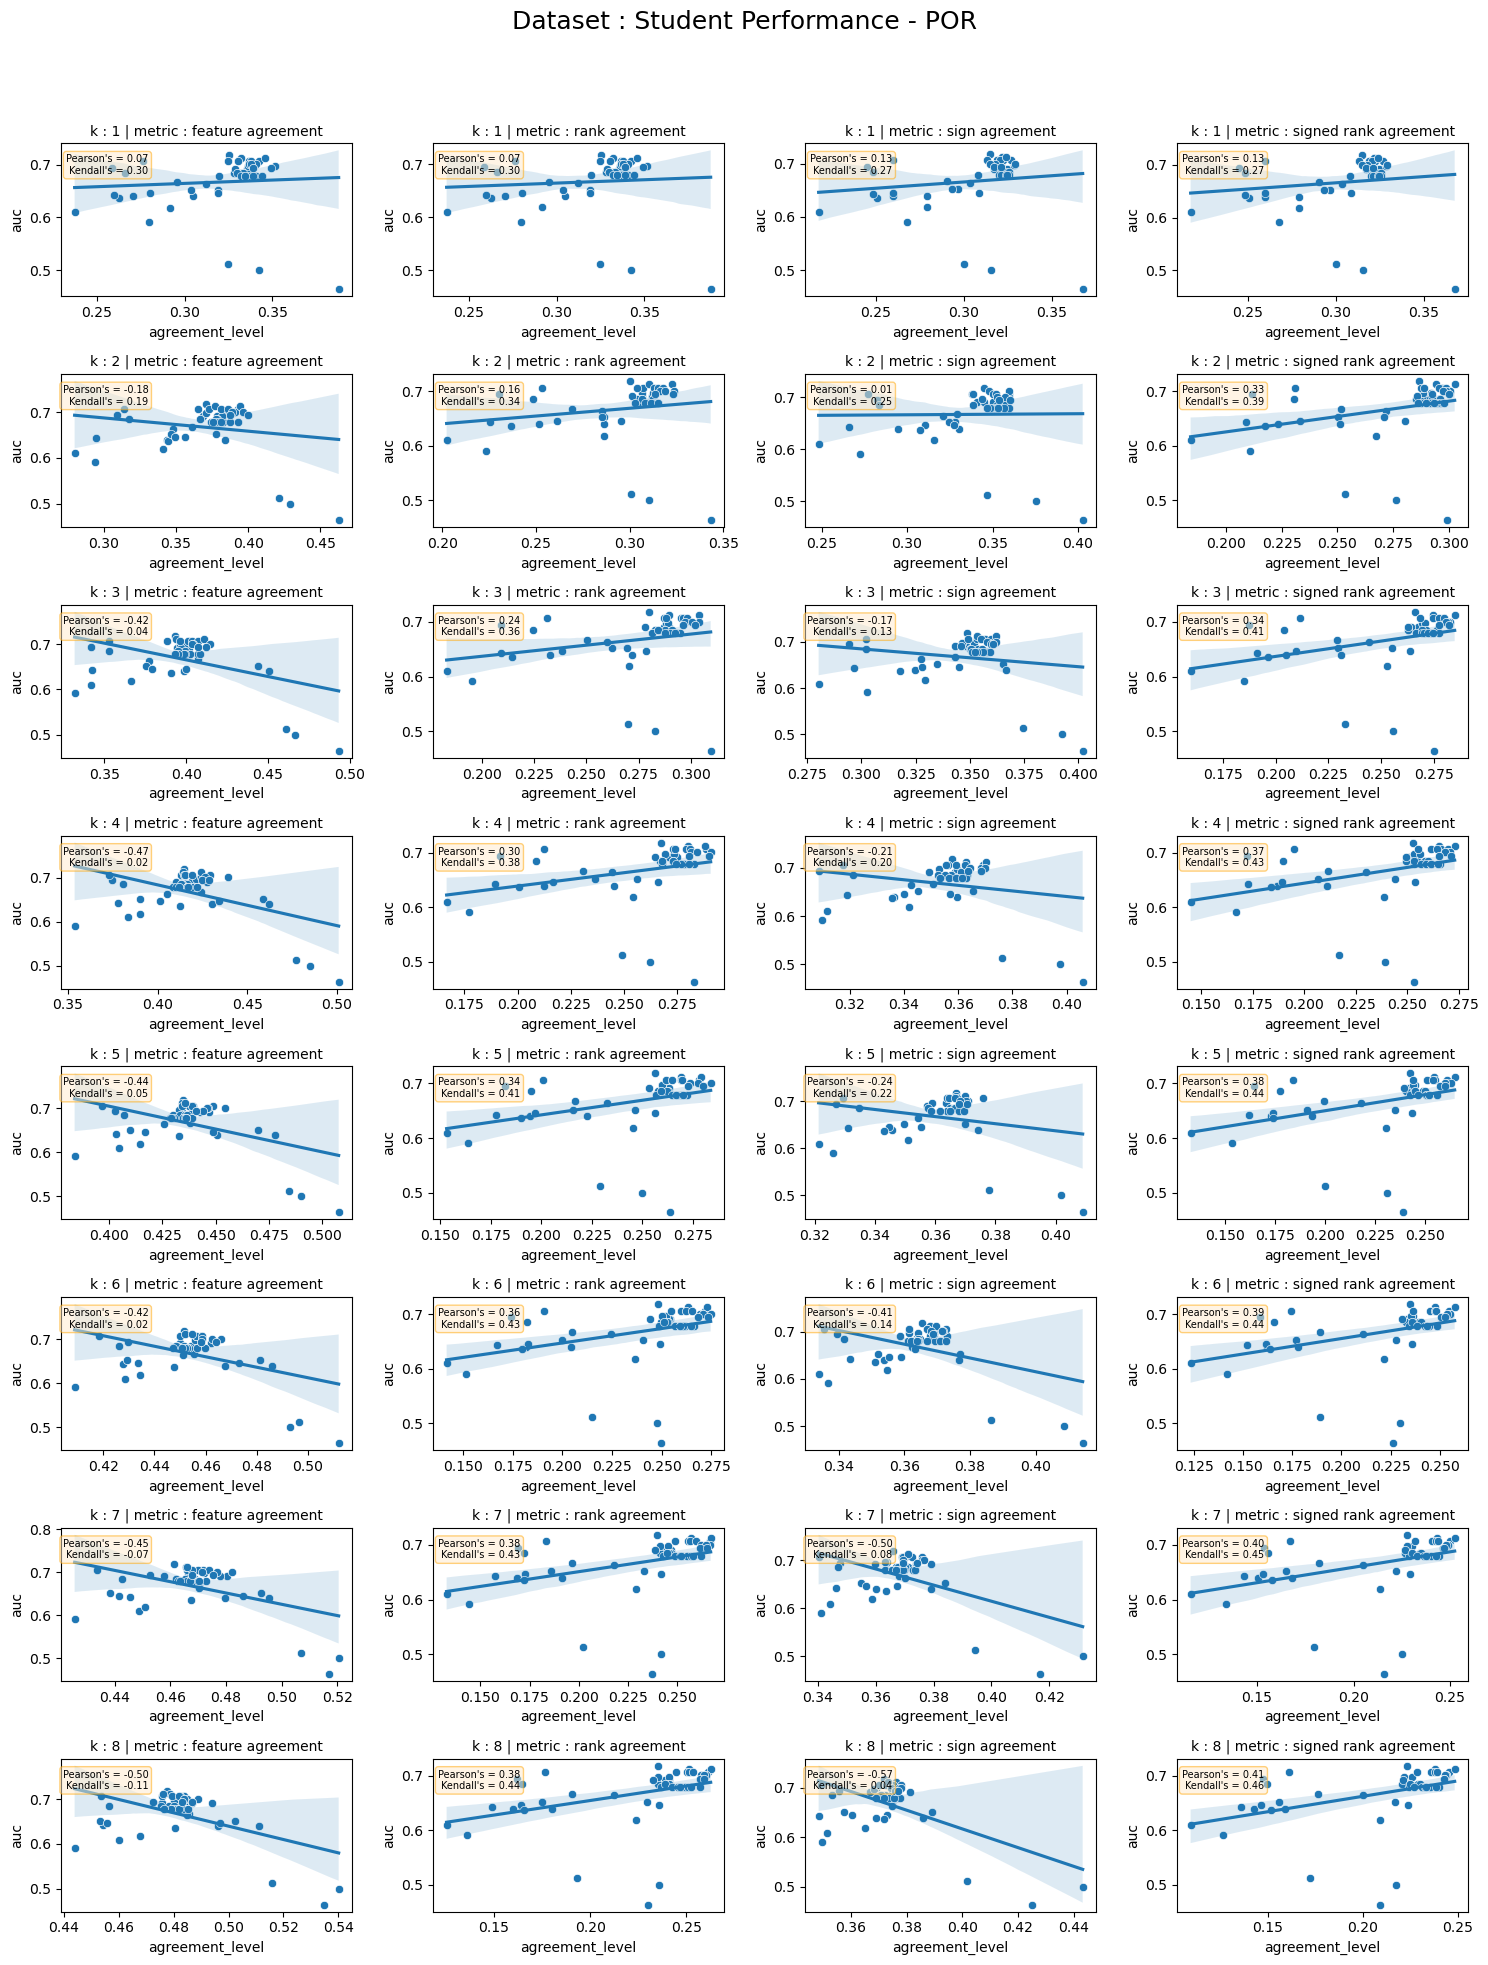

In [28]:
Row = 8
Col = 4

fig, axes = plt.subplots(Row, Col, figsize=(15, 20))
R=0
C=0

for k in np.arange(1,9):
    for metric_name in [*list_metrics.keys()]:
        rslt_df = sel_df_agreement[(sel_df_agreement['combination'] == 'Average') & 
                           (sel_df_agreement['k'] == k) & 
                           (sel_df_agreement['metric'] == metric_name)]
        
        rslt_df = rslt_df.reset_index()
        rslt_df.epoch = rslt_df.epoch.astype(int)
        rslt_df.agreement_level = rslt_df.agreement_level.astype(float)
        rslt_df.k = rslt_df.k.astype(int)
        
        sns.scatterplot(x=rslt_df['agreement_level'], y=df_metrics['auc'], ax=axes[R, C])
        sns.regplot(x=rslt_df['agreement_level'], y=df_metrics['auc'], scatter=False, ax=axes[R, C])
        r_pearson, pv_1 = stats.pearsonr(rslt_df['agreement_level'], df_metrics['auc'])
        r_kendall, pv_2 = stats.kendalltau(rslt_df['agreement_level'], df_metrics['auc'])
        stats_box = (f"Pearson's = {r_pearson:.2f}\n"
                     f"Kendall's = {r_kendall:.2f}")
        bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
        axes[R, C].text(0.3, 0.8, stats_box, fontsize=7, bbox=bbox,
                transform=axes[R, C].transAxes, horizontalalignment='right')
        
        axes[R, C].set_title('k : ' + str(k) + ' | metric : '+ metric_name, fontsize = 10)
#         axes[R, C].set_xlim(0, 1)
        if C == (Col-1): 
            C=0
            R+=1
        else:
            C+=1

fig=axes[0,0].figure
# fig.text(0.0,0.5, 'k', ha="center", va="center", rotation=90)

plt.suptitle('Dataset : Student Performance - POR', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('./data/student_performance/NN/experiment_C/grad_methods_auc_vs_agreement_global_level.png')